In [1]:
import tensorflow as tf
from tensorflow import keras    

In [2]:
import matplotlib.pyplot as plt

In [3]:
keras.__version__ 

'2.8.0'

# Classification Fashion MNIST

In [4]:
fmnist_data = keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) = fmnist_data.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

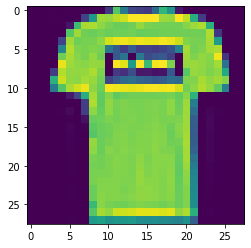

In [8]:
plt.imshow(x_train[1,])

##Normalize Data

In [9]:
x_train, x_test = x_train/255.0, x_test/255.0

## Sequential model

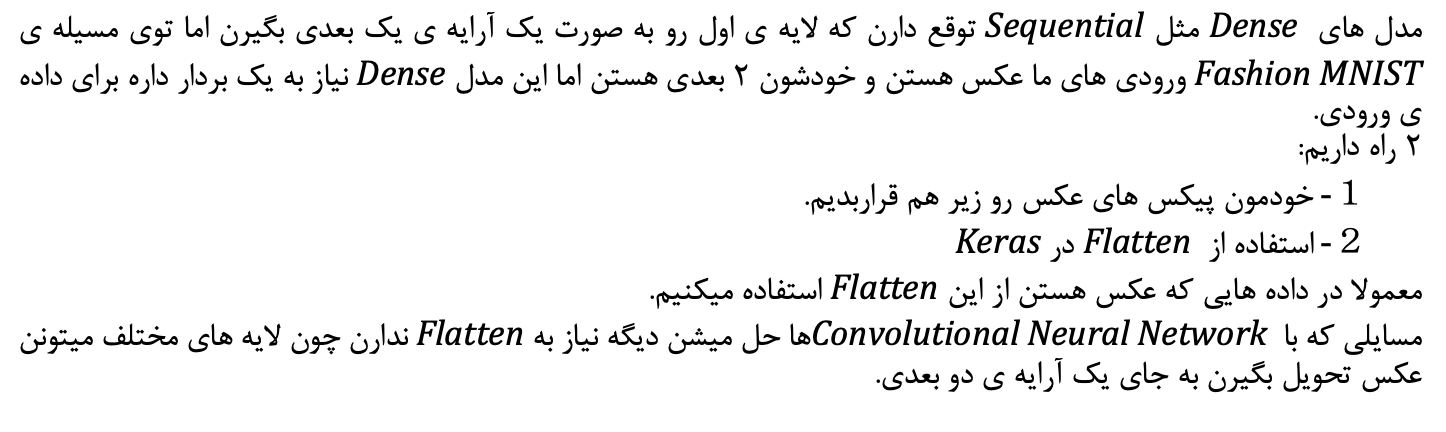

## Define Model

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
# این خط کد میاد عکس رو که ۲۸ در ۲۸ هست به یک آرایه تبدیل میکنه
model.add(keras.layers.Dense(100, activation ="relu"))
model.add(keras.layers.Dense(75, activation ="relu"))
model.add(keras.layers.Dense(10, activation ="softmax"))

یک روش دیگه برای ساخت همون مدل قبلی

In [11]:
'''
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape = [28,28]),
  keras.layers.Dense(100, activation ="relu"),
  keras.layers.Dense(75, activation ="relu"),
  keras.layers.Dense(10, activation ="softmax")
])
'''

'\nmodel = keras.models.Sequential([\n  keras.layers.Flatten(input_shape = [28,28]),\n  keras.layers.Dense(100, activation ="relu"),\n  keras.layers.Dense(75, activation ="relu"),\n  keras.layers.Dense(10, activation ="softmax")\n])\n'

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 10)                760       
                                                                 
Total params: 86,835
Trainable params: 86,835
Non-trainable params: 0
_________________________________________________________________


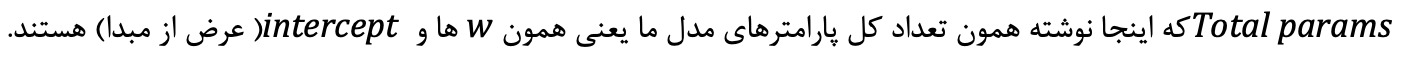

## Weights and Bias

In [13]:
model.layers

In [14]:
weights , bias = model.layers[1].get_weights()

In [15]:
weights

array([[-0.07608578, -0.05015331, -0.07738271, ...,  0.02551579,
        -0.03339649, -0.03543999],
       [ 0.05941439,  0.02605293,  0.02349029, ..., -0.04041802,
         0.06768377,  0.00165574],
       [ 0.07621506, -0.01911192, -0.03980593, ...,  0.01200934,
        -0.0513694 ,  0.0089565 ],
       ...,
       [-0.04103657,  0.07051305,  0.03443368, ...,  0.0814116 ,
        -0.03880233, -0.05978226],
       [ 0.02102021,  0.05758463, -0.01842903, ..., -0.01708188,
        -0.00118417,  0.00065006],
       [-0.01742379,  0.05275567,  0.00350169, ..., -0.02140331,
         0.05268759, -0.05745313]], dtype=float32)

In [16]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

الان اینجا بایاس صفر هست اما با استفاده از یکی از پارامترهای مدل میشه بایاس رو هم مقداردهی اولیه کرد

## Fit and Model Compile

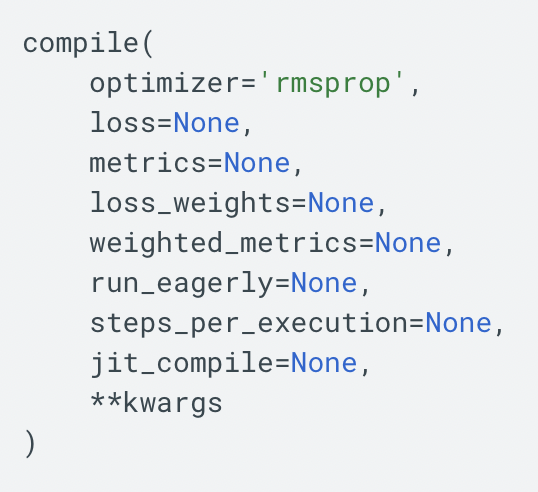

In [17]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = 'sgd',
              metrics = ["accuracy"])

هنوز این مدل داده رو ندیده

### Fit Model

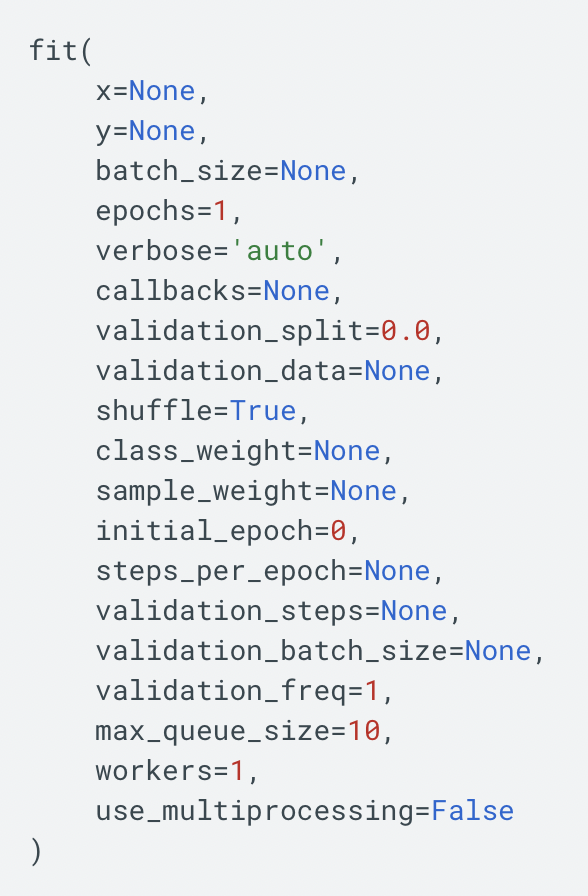

In [18]:
history = model.fit(x_train, y_train, epochs=50 , validation_split=0.15)

Epoch 1/50
1594/1594 [==============================] - 10s 6ms/step - loss: 0.7781 - accuracy: 0.7426 - val_loss: 0.5551 - val_accuracy: 0.8090
Epoch 2/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5059 - accuracy: 0.8256 - val_loss: 0.4749 - val_accuracy: 0.8366
Epoch 3/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4581 - accuracy: 0.8400 - val_loss: 0.4614 - val_accuracy: 0.8381
Epoch 4/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4297 - accuracy: 0.8498 - val_loss: 0.4356 - val_accuracy: 0.8483
Epoch 5/50
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4109 - accuracy: 0.8562 - val_loss: 0.4155 - val_accuracy: 0.8498
Epoch 6/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3954 - accuracy: 0.8603 - val_loss: 0.4067 - val_accuracy: 0.8592
Epoch 7/50
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3833 - accuracy: 0.8647 - val_loss: 0.4055 - val_accuracy

### save fit history - loss plot and model Accuracy


In [19]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1594}

In [20]:
print(history.history)

{'loss': [0.7781053781509399, 0.5059047341346741, 0.4580885171890259, 0.4297446012496948, 0.4109445810317993, 0.39541804790496826, 0.3833387792110443, 0.3710143566131592, 0.36146318912506104, 0.35205158591270447, 0.34515491127967834, 0.33747467398643494, 0.3307192921638489, 0.3241526782512665, 0.3186754286289215, 0.3128287196159363, 0.3070272207260132, 0.30255126953125, 0.29792672395706177, 0.29316064715385437, 0.2884834110736847, 0.28376683592796326, 0.2808433473110199, 0.2765021324157715, 0.2730294167995453, 0.2691810727119446, 0.2655196189880371, 0.2628108561038971, 0.2590791881084442, 0.2556207776069641, 0.25327053666114807, 0.24901464581489563, 0.24638064205646515, 0.24432583153247833, 0.24055328965187073, 0.23814813792705536, 0.23604363203048706, 0.23256585001945496, 0.22941672801971436, 0.22705861926078796, 0.22531114518642426, 0.22279176115989685, 0.22018980979919434, 0.21786954998970032, 0.21612469851970673, 0.21190756559371948, 0.210891455411911, 0.20891502499580383, 0.206125

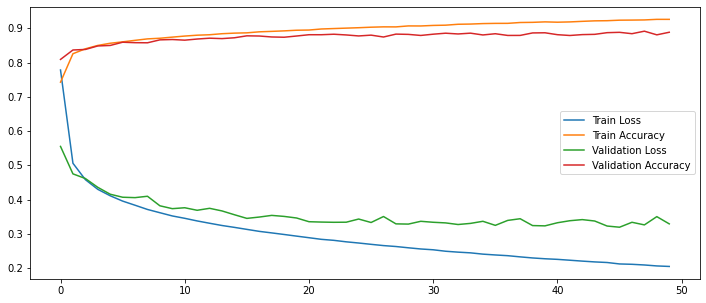

In [23]:
fig ,ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"], label = 'Train Loss')
ax.plot(history.history["accuracy"], label ='Train Accuracy')
ax.plot(history.history["val_loss"], label ='Validation Loss')
ax.plot(history.history["val_accuracy"], label ='Validation Accuracy')
ax.legend()

## Evaluate model over Test Set

In [24]:
model.evaluate(x_test, y_test)
#First is loss, second is the metrics which is Accuracy Here

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8798


[0.3498005270957947, 0.879800021648407]

الان اینجا روی داده ی تست مدل ما ۸۷ درصد دقت داره

In [27]:
x3 = x_test[1:3,:,:]
x3.shape

(2, 28, 28)

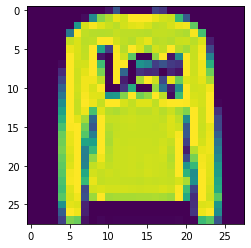

In [33]:
plt.imshow(x3[0])

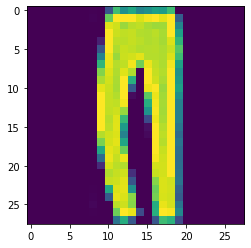

In [34]:
plt.imshow(x3[1])

In [32]:
model.predict(x3).round(3)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
model.predict(x3).shape

(2, 10)

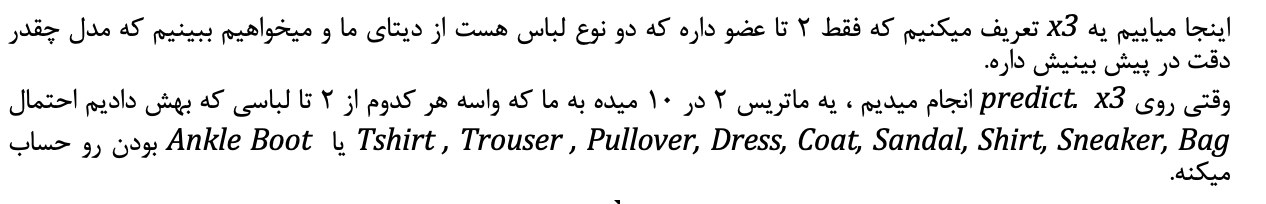

In [36]:
import numpy as np

In [42]:
np.argmax(model.predict(x3).round(3), axis=1)    #our model prediction

array([2, 1])

اینجا دیگه راحت اندیس ها رو بهمون داده و میتونیم توی جدول اندیس ها نگاه کنیم که چی هست این اندیس مثلا شلوار هست یا پلیور

In [43]:
y_test[1:3]    #real data = our model prediction

array([2, 1], dtype=uint8)